In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../Downloads/BankNote_Authentication.csv")

In [5]:
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [4]:
df.isna().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [6]:
np.unique(df["class"])

array([0, 1], dtype=int64)

In [7]:
x = df.drop(columns = ["class"])
y = df["class"]

In [8]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [14]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators = 50)
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)

Accuracy Score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       157
           1       1.00      1.00      1.00       118

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



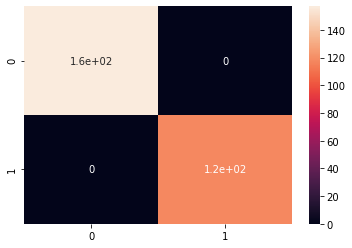

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(ytest, ypred)
sns.heatmap(cm, annot = True)
print("Accuracy Score:", accuracy_score(ytest, ypred))
print(classification_report(ytest, ypred))